# Utilização básica do construtor de campos

A função mais elementar deste módulo é a construção do perfil transversal de campos ópticos. Dado que a memória de qualquer computador é limitada, devemos definir um estrato finito do espaço para computar o campo.

In [1]:
# módulo de controle simples de arrays
import numpy as np
# módulo de produção de gráficos
import matplotlib.pyplot as plt

# construção da janela computacional
l = np.linspace(-40.0, +40.0, 500); # lista de pontos da partição dos eixos x e y
X, Y = np.meshgrid(l,l);            # matriz de x e y dos pontos da malha de partição

# computação dos limites dos eixos
extremos = [
    l[0], l[-1],                    # extremos do eixo x
    l[0], l[-1]                     # extremos do eixo y
];

a seguir importamos o módulo `opticalField` para a computação do campo (notando que `opticalField/` está no diretório pai do `examples/`).

In [2]:
# retornar ao diretório raíz do projeto
%cd -q ../
# importa a função createField do módulo
from opticalField import createField

## Construção de campo por `createField`

Campos ópticos são implementados computacionalmente pelo construtor `createField()` como uma matriz (`np.ndarray`) com entradas complexas (`complex`) herdando assim as suas operações e métodos.

> `createField(F, region)`
>
>> retorna o campo `F` (envoltória do campo) computado nos pontos de `region` (`2-tupla` de `np.meshgrid` X,Y com as coordenadas da janela computacional).
>
> parâmetros opcionais:
>
>> `center` = (x, y)
>>
>> `2-tupla` de `float` das coordenadas do centro (origem) da envoltória do campo.
>
>> `phase`
>>
>> `float` ou `np.ndarray` (matrix) de `float` com o valor da fase da onda ao longo da janela computacional.
>
>> `incidentWaveK` = (k, phi_x, phi_y)
>>
>> `3-tupla` de `float` com os parâmetros de incidência do campo no plano transverso.
>
>> `normalize` = `True` ou `False`
>>
>> `bool` condição para normalização da intensidade do campo.

a exemplo criaremos aqui um campo com perfil de envoltória gaussiana (um feixe gaussiano) com uma cintura de feixe `w0`, deslocado da origem a $(-20, 15)$ e com intensidade normalizada e uma fase aleatória.

In [12]:
w0 = 10.0;                          # cintura do feixe
random_phase = 2.0 * np.pi * np.random.rand(len(l), len(l));
gaussian = createField(
    lambda x, y: np.exp(-(x ** 2 + y ** 2)/(w0)**2.0),
    region = (X, Y),
    center = (-20, 15),
    normalize = True,
    phase = random_phase
);

### Propriedades do perfil transversal do campo

Algumas funções de cálculo de propriedades do perfil transversal do campo são já implementadas pelo módulo `opticalField`.

> `intensity(U : OpticalField)`
> 
> Computa o perfil de intensidade no plano transversal ao eixo de propagação da luz.

> `phase(U : OpticalField)`
> 
> Computa o perfil de fase no plano transversal ao eixo de propagação da luz.


In [13]:
from opticalField import intensity, phase

#### Perfil de intensidade transversal do campo

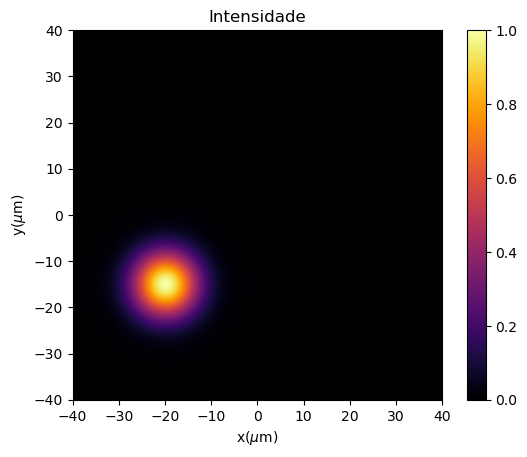

In [14]:
# criação de figuras para plotagem de imagem
fig, ax = plt.subplots();

# rotulação do título da figura
ax.set_title('Intensidade');

# rotulação dos eixos coordenados
ax.set_xlabel('x($\mu$m)')
ax.set_ylabel('y($\mu$m)')

# geração de imagem do perfil de intesidade do campo óptico
imageIntensity = ax.imshow(
    intensity(gaussian),
    cmap = 'inferno',               # define o mapa de cores
    extent = extremos               # define a extensão dos eixos x e y
);
fig.colorbar(imageIntensity);       # insere uma colorbar

#### Perfil de fase transversal do campo

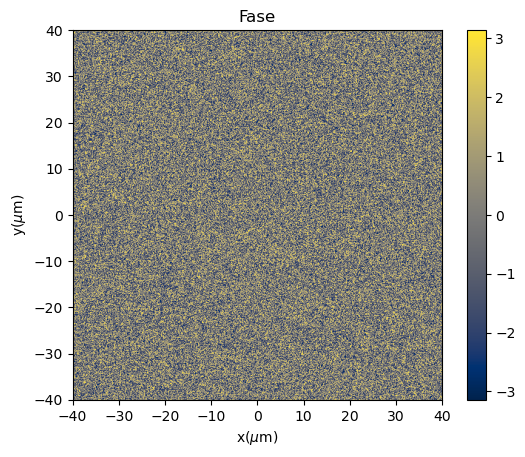

In [15]:
# criação de figuras para plotagem de imagem
fig, ax = plt.subplots();

# rotulação do título da figura
ax.set_title('Fase');

# rotulação dos eixos coordenados
ax.set_xlabel('x($\mu$m)')
ax.set_ylabel('y($\mu$m)')

# geração de imagem do perfil de fase do campo óptico
imageIntensity = ax.imshow(
    phase(gaussian),
    cmap = 'cividis',               # define o mapa de cores
    extent = extremos               # define a extensão dos eixos x e y
);
fig.colorbar(imageIntensity);       # insere uma colorbar

### Operações elementares com campos

Dado que um campo óptico foi aqui implementado como uma matriz (`np.ndarray`) podemos utilizar das operações matemáticas usuais e das funções dos módulos python (em especial `numpy` e `scipy`) sobre tais campos.

#### Construção de um campo speckle

A título de exemplo da aplicação de métodos dos módulos pyton, construiremos a seguir um campo speckle.

In [16]:
# importação da transformada de Fourier
from scipy.fftpack import fft2

speckle = fft2(gaussian);

##### Perfil de intensidade transversal do campo

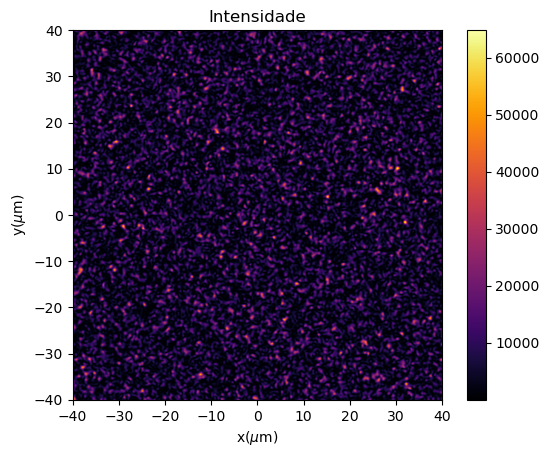

In [17]:
# criação de figuras para plotagem de imagem
fig, ax = plt.subplots();

# rotulação do título da figura
ax.set_title('Intensidade');

# rotulação dos eixos coordenados
ax.set_xlabel('x($\mu$m)')
ax.set_ylabel('y($\mu$m)')

# geração de imagem do perfil de intesidade do campo speckle
imageIntensity = ax.imshow(
    intensity(speckle),
    cmap = 'inferno',               # define o mapa de cores
    extent = extremos               # define a extensão dos eixos x e y
);
fig.colorbar(imageIntensity);       # insere uma colorbar